In [1]:
import numpy as np
np.random.seed(1)
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
import skimage.data
from skimage.color import rgb2gray
from skimage.color import rgba2rgb
from skimage.filters import threshold_mean
from skimage.transform import resize
import network
from PIL import Image

In [2]:
def get_corrupted_input(input, corruption_level):
    
    corrupted = np.copy(input)
    inv = np.random.binomial(n=1, p=corruption_level, size=len(input))
    for i, v in enumerate(input):
        if inv[i]:
            corrupted[i] = -1 * v

    return corrupted

In [3]:
def reshape(data):
    dim = int(np.sqrt(len(data)))
    data = np.reshape(data, (dim, dim))
    return data

In [4]:
def plot(data, test, predicted, figsize=(5, 6)):
    data = [reshape(d) for d in data]
    test = [reshape(d) for d in test]
    predicted = [reshape(d) for d in predicted]

    fig, axarr = plt.subplots(len(data), 3, figsize=figsize)
    for i in range(len(data)):
        if i==0:
            axarr[i, 0].set_title('Train data')
            axarr[i, 1].set_title("Input data")
            axarr[i, 2].set_title('Output data')

        axarr[i, 0].imshow(data[i])
        axarr[i, 0].axis('off')
        axarr[i, 1].imshow(test[i])
        axarr[i, 1].axis('off')
        axarr[i, 2].imshow(predicted[i])
        axarr[i, 2].axis('off')

    plt.tight_layout()
    plt.savefig("result.png")
    plt.show()

In [5]:
def preprocessing(img, w=2, h=2):
    # Resize image
    img = resize(img, (w,h), mode='reflect')

    # Thresholding
    thresh = threshold_mean(img)
    binary = img > thresh
    shift = 2*(binary*1)-1 # Boolian to int

    # Reshape
    flatten = np.reshape(shift, (w*h))
    return flatten

Start to data preprocessing...
Start to train weights...


100%|███████████████████████████████████████████| 4/4 [00:00<00:00, 6200.01it/s]


Start to predict...


100%|███████████████████████████████████████████| 4/4 [00:00<00:00, 2518.72it/s]

Show prediction results...


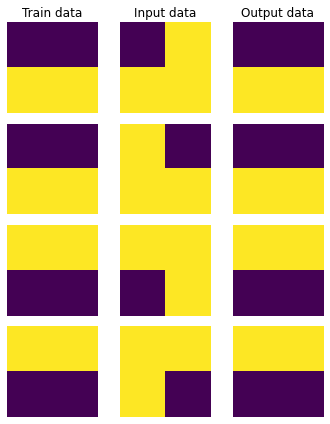

Show network weights matrix...


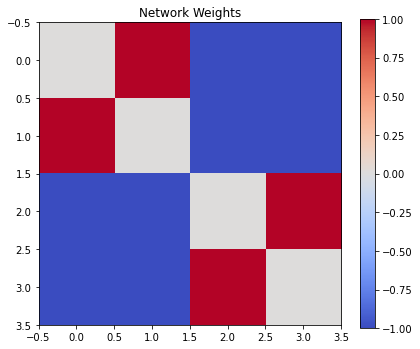

In [6]:
def main():
    # Load data
    camera = rgb2gray(rgba2rgb(np.array(Image.open('arriba.png'))))
    astronaut = rgb2gray(rgba2rgb(np.array(Image.open('arriba.png'))))
    horse = rgb2gray(rgba2rgb(np.array(Image.open('abajo.png'))))
    coffee = rgb2gray(rgba2rgb(np.array(Image.open('abajo.png'))))

    # Marge data
    data = [camera, astronaut, horse, coffee]

    # Preprocessing
    print("Start to data preprocessing...")
    data = [preprocessing(d) for d in data]

    # Create Hopfield Network Model
    model = network.HopfieldNetwork()
    model.train_weights(data)

    # Generate testset
    test = [get_corrupted_input(d, 0.3) for d in data]
    
    uno = np.array([-1,1,1,1])
    dos = np.array([1,-1,1,1])
    tres = np.array([1,1,-1,1])
    cuatro = np.array([1,1,1,-1])

    test2 = [uno, dos, tres, cuatro]

    predicted = model.predict(test, threshold=0, asyn=False)
    print("Show prediction results...")
    plot(data, test2, predicted)
    print("Show network weights matrix...")
    model.plot_weights()

if __name__ == '__main__':
    main()